# 读取

In [61]:
import pandas as pd
import numpy as np
import xarray as xr
import proplot as plot
from sklearn.feature_selection import f_regression
import math

In [62]:
sada = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_calculate/halosteric_sea_level_2000_anomaly_m.nc')
salinity1 = sada.salinity
salinity1.coords['time'] = pd.date_range('1980-1',freq='1M',periods=468)
halo = salinity1*1000

sada1 = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_calculate/thermosteric_sea_level_2000_anomaly_m.nc')
salinity2 = sada1.__xarray_dataarray_variable__
salinity2.coords['time'] = pd.date_range('1980-1',freq='1M',periods=468)
therm = salinity2*1000

sada2 = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_calculate/steric_sea_level_2000_anomaly_m.nc')
salinity3 = sada2.__xarray_dataarray_variable__
steric = salinity3*1000


salinity = [halo,therm,steric]

# 数据处理 

In [63]:
for i in [0,1,2]:
    salinity[i] = salinity[i].fillna(99999999)

# 回归 

In [64]:
ONI = xr.open_dataset('D:/ENSO_salinity/data/ONI/ONI.nc')
ONI = ONI.indexs

In [65]:
pre_reg = []
pre_cor_sig = []
area = []
for j in [0,1,2]:
    for i in [-8,-4]:
        try:
            salinity_selected = salinity[j][:i]
            ONI_selected = ONI[-i:]
            lat, lon = salinity[j]['lat'], salinity[j]['lon']
            regression = np.array(salinity_selected).reshape(salinity_selected.shape[0],salinity_selected.shape[1]*salinity_selected.shape[2])
            A = np.vstack([ONI_selected, np.ones(len(ONI_selected))]).T
            pre_re = np.linalg.lstsq(A,regression,rcond=None)[0][0].reshape(len(lat),len(lon))
            pre_cor_si = f_regression(np.nan_to_num(regression), ONI_selected)[1].reshape(len(lat),len(lon))
            are = np.where(pre_cor_si < 0.05)
            pre_reg.append(pre_re)
            pre_cor_sig.append(pre_cor_si)
            area.append(are)
        except:
            salinity_selected = salinity[j][:i]
            ONI_selected = ONI[-i:-1]
            lat, lon = salinity[j]['lat'], salinity[j]['lon']
            regression = np.array(salinity_selected).reshape(salinity_selected.shape[0],salinity_selected.shape[1]*salinity_selected.shape[2])
            A = np.vstack([ONI_selected, np.ones(len(ONI_selected))]).T
            pre_re = np.linalg.lstsq(A,regression,rcond=None)[0][0].reshape(len(lat),len(lon))
            pre_cor_si = f_regression(np.nan_to_num(regression), ONI_selected)[1].reshape(len(lat),len(lon))
            are = np.where(pre_cor_si < 0.05)
            pre_reg.append(pre_re)
            pre_cor_sig.append(pre_cor_si)
            area.append(are)
        
        

    try:
        salinity_selected = salinity[j][:]
        ONI_selected = ONI[:]
        lat1, lon1 = salinity[j]['lat'], salinity[j]['lon']
        regression = np.array(salinity_selected).reshape(salinity_selected.shape[0],salinity_selected.shape[1]*salinity_selected.shape[2])
        A = np.vstack([ONI_selected, np.ones(len(ONI_selected))]).T
        pre_re = np.linalg.lstsq(A,regression,rcond=None)[0][0].reshape(len(lat1),len(lon1))
        pre_cor_si = f_regression(np.nan_to_num(regression), ONI_selected)[1].reshape(len(lat1),len(lon1))
        are = np.where(pre_cor_si < 0.05)
        pre_reg.append(pre_re)
        pre_cor_sig.append(pre_cor_si)
        area.append(are)
    except:
        salinity_selected = salinity[j][:]
        ONI_selected = ONI[:-1]
        lat1, lon1 = salinity[j]['lat'], salinity[j]['lon']
        regression = np.array(salinity_selected).reshape(salinity_selected.shape[0],salinity_selected.shape[1]*salinity_selected.shape[2])
        A = np.vstack([ONI_selected, np.ones(len(ONI_selected))]).T
        pre_re = np.linalg.lstsq(A,regression,rcond=None)[0][0].reshape(len(lat1),len(lon1))
        pre_cor_si = f_regression(np.nan_to_num(regression), ONI_selected)[1].reshape(len(lat1),len(lon1))
        are = np.where(pre_cor_si < 0.05)
        pre_reg.append(pre_re)
        pre_cor_sig.append(pre_cor_si)
        area.append(are)
        
    try:
        for i in [4,8]:
            salinity_selected = salinity[j][i:]
            ONI_selected = ONI[:-i]
            lat, lon = salinity[j]['lat'], salinity[j]['lon']
            regression = np.array(salinity_selected).reshape(salinity_selected.shape[0],salinity_selected.shape[1]*salinity_selected.shape[2])
            A = np.vstack([ONI_selected, np.ones(len(ONI_selected))]).T
            pre_re = np.linalg.lstsq(A,regression,rcond=None)[0][0].reshape(len(lat),len(lon))
            pre_cor_si = f_regression(np.nan_to_num(regression), ONI_selected)[1].reshape(len(lat),len(lon))
            are = np.where(pre_cor_si < 0.05)
            pre_reg.append(pre_re)
            pre_cor_sig.append(pre_cor_si)
            area.append(are)
    except:
        for i in [4,8]:
            salinity_selected = salinity[j][i:]
            ONI_selected = ONI[1:-i]
            lat, lon = salinity[j]['lat'], salinity[j]['lon']
            regression = np.array(salinity_selected).reshape(salinity_selected.shape[0],salinity_selected.shape[1]*salinity_selected.shape[2])
            A = np.vstack([ONI_selected, np.ones(len(ONI_selected))]).T
            pre_re = np.linalg.lstsq(A,regression,rcond=None)[0][0].reshape(len(lat),len(lon))
            pre_cor_si = f_regression(np.nan_to_num(regression), ONI_selected)[1].reshape(len(lat),len(lon))
            pre_reg.append(pre_re)
            pre_cor_sig.append(pre_cor_si)
            area.append(are)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Admi

# 画图

ValueError: Levels [ nan 0.05  nan] contain invalid values.

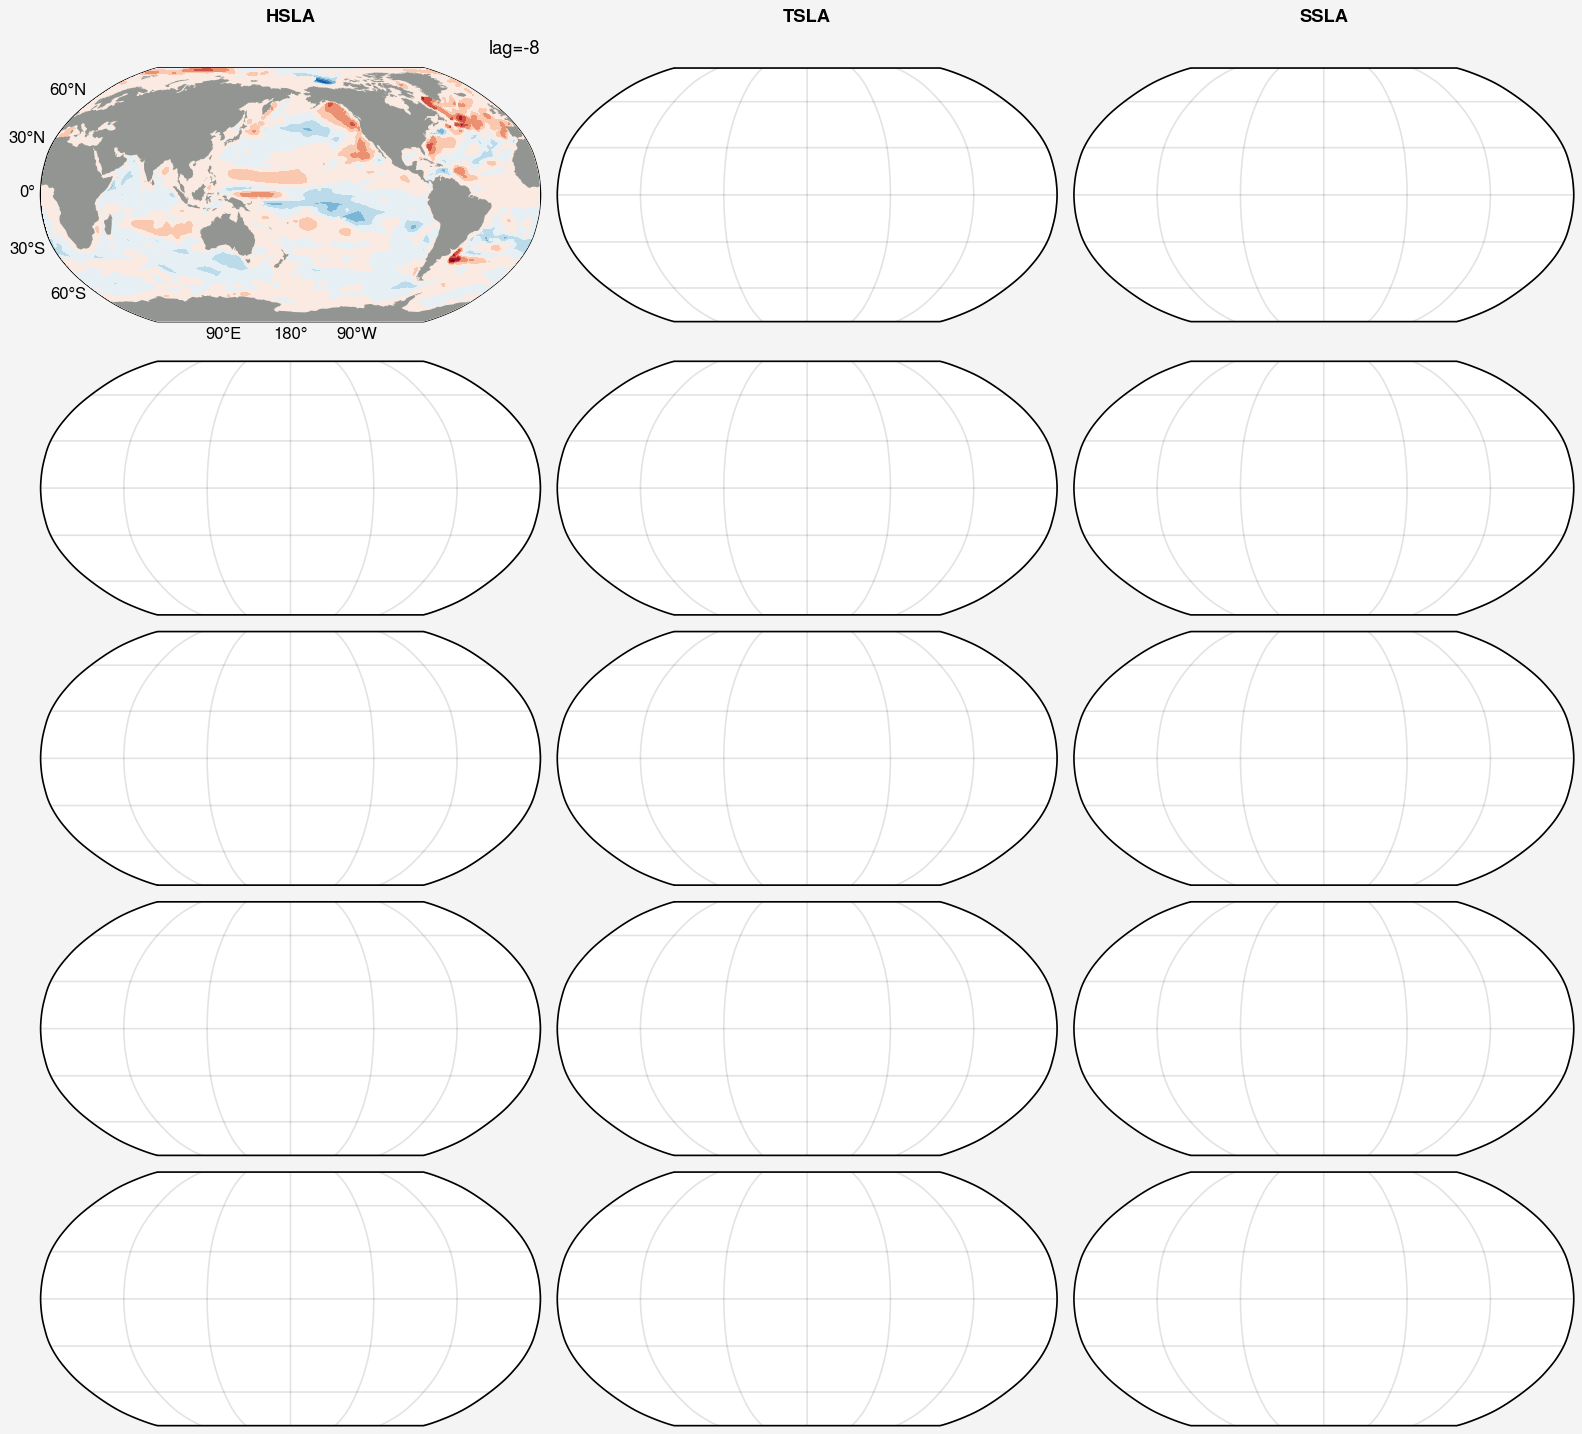

In [66]:
plot.rc.update({'fontsize':6})
fig, axs = plot.subplots(nrows=5,ncols=3,width_ratios=2,sharey=True,proj='robin',proj_kw={'lon_0':180},basemap=True,tight=True)
title = ['lag=-8','lag=-4','lag=0','lag=4','lag=8']
axs.format(collabels=['HSLA','TSLA','SSLA'])
for i in range(0,5):
    ax = axs[i,0]
    ax.format(title=title[i],land=True,landcolor='gray',labels=True,landzorder=4,gridlinewidth=0,latlines=30,lonlines=90,lonlabels=True,titleloc='right')
    level = plot.arange(-10,10,2) 
    filled_c = ax.contourf(lon,lat,pre_reg[i],levels=level,cmap='RdBu_r',extend='both',labels=False)
    c1b = ax.contourf(lon,lat,pre_cor_sig[i],levels=[np.min(pre_cor_sig[i]),0.05,np.max(pre_cor_sig[i])],
                          zorder=1,hatches=['.', None],colors=["none","grey"])
    ax.grid(linestyle='None')
cbar = fig.colorbar(filled_c,ticks=2,label='mm $K^{-1}$',length=0.7,loc='b',col=1)

for i in range(5,10):
    ax = axs[i-5,1]
    ax.format(title=title[i-5],land=True,landcolor='gray',labels=True,landzorder=4,gridlinewidth=0,latlines=30,lonlines=90,lonlabels=True,titleloc='right')
    level = plot.arange(-10,10,2)
    filled_c = ax.contourf(lon,lat,pre_reg[i],levels=level,cmap='RdBu_r',extend='both',labels=False)
    ax.grid(linestyle='None')
ax.grid(linestyle='None')

for i in range(10,15):
    ax = axs[i-10,2]
    ax.format(title=title[i-10],land=True,landcolor='gray',labels=True,landzorder=4,gridlinewidth=0,latlines=30,lonlines=90,lonlabels=True,titleloc='right')
    level = plot.arange(-10,10,2)
    filled_c1 = ax.contourf(lon,lat,pre_reg[i],levels=level,cmap='RdBu_r',extend='both',labels=False)
    ax.grid(linestyle='None')
ax.grid(linestyle='None')
#fig.savefig('D:/steric_sea_level/fig/Global_regression_steric_sea_level.eps',dpi=600,format='eps')